#  1.Problem definition🌀

>Given data about hourly air pollutants data from 12 nationally-controlled air-quality monitoring sites in beijing,
could we analysis and visualized the data?

# 2.Data

The data source is from Kaggle Beijing Multi-site air quality:
https://www.kaggle.com/sid321axn/beijing-multisite-airquality-data-set

Another source is from UCI Machine Learing Repostory:
https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data#

# 3. Evaluation

We will get information that is necessary and visualized it

# 4.Features

Data dictionary:
* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site





* The air-quality data are from the **Beijing Municipal Environmental Monitoring Center.**

The meteorological data in each air-quality site are matched with the nearest weather station from the China    Meteorological Administration. 

* The time period is from : **March 1st, 2013 to February 28th, 2017.**

Missing data are denoted as NA.


## Create dictionary with data dictionary

In [1]:
data_dict = {
    'No' : 'row number',
    'year' : 'year of data in this row',
    'month' : 'month of data in this row',
    'day' : 'day of data in this row',
    'hour' : 'hour of data in this row',
    'PM2.5' : 'PM2.5 concentration (ug/m^3)',
    'PM10' :' PM10 concentration (ug/m^3)',
    'SO2' : 'SO2 concentration (ug/m^3)',
    'NO2' : 'NO2 concentration (ug/m^3)',
    'CO' : 'CO concentration (ug/m^3)',
    'O3' : 'O3 concentration (ug/m^3)',
    'TEMP' : 'temperature (degree Celsius)',
    'PRES' :' pressure (hPa)',
    'DEWP' :' dew point temperature (degree Celsius)',
    'RAIN' :' precipitation (mm)',
    'wd' : 'wind direction',
    'WSPM' : 'wind speed (m/s)',
    'station' : 'name of the air-quality monitoring site'
            }

## Exploratory data analysis

In [2]:
#Basic tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline


In [3]:
# Import data
path = r'Data/PRSA_Data_20130301-20170228'
all_files = glob.glob(path + "/*.csv")

li= []

for filename in all_files:
    df = pd.read_csv(filename, index_col=['No'])
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=False)    



In [4]:
#Create a data columns by combining the year,month,day,hour columns
cols=["year","month","day",'hour']
frame['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

#Add year month columns
cols_2 = ['year','month']
frame['year-month'] = df[cols_2].apply(lambda x: '-'.join(x.values.astype(str)), axis='columns')

In [5]:
frame

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,year-month
No,,,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-3-1-0,2013-3
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-3-1-1,2013-3
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-3-1-2,2013-3
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-3-1-3,2013-3
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-3-1-4,2013-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-2-28-19,2017-2
35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-2-28-20,2017-2
35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-2-28-21,2017-2


In [6]:
frame.isna().sum()

year              0
month             0
day               0
hour              0
PM2.5          8739
PM10           6449
SO2            9021
NO2           12116
CO            20701
O3            13277
TEMP            398
PRES            393
DEWP            403
RAIN            390
wd             1822
WSPM            318
station           0
date              0
year-month        0
dtype: int64

## Filling our missing data

### Decided what central tendency to filling our missing value
How to decide:
1. Boxplots
2. Distribution plots


E:\Vincent\Course\Progamming-Course\ML-and-DS\Project\Regression\beijing-air-quality-project\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM2.5'>

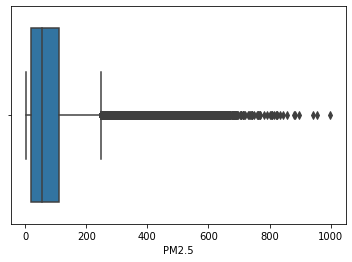

In [7]:
import seaborn as sns

sns.boxplot(frame['PM2.5'])

E:\Vincent\Course\Progamming-Course\ML-and-DS\Project\Regression\beijing-air-quality-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

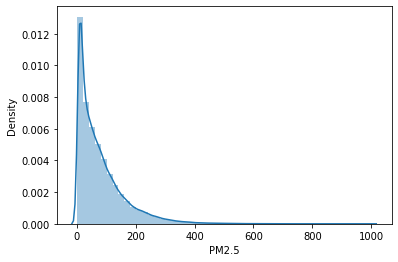

In [8]:
sns.distplot(frame['PM2.5'])

Since our distribution plot is positive skewed , we decided to fill our missing data with mode

### Filling data with mode

In [9]:
for label,content in frame.items():
    if pd.isnull(content).sum():
        
        #Add binary columns for backup info what missing before get filled
        frame[label + '_is_missing'] = pd.isnull(content)
        
        #Filling with mode
        
        frame[label] = content.fillna(content.mode()[0])
        

In [10]:
frame[ :5500]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,SO2_is_missing,NO2_is_missing,CO_is_missing,O3_is_missing,TEMP_is_missing,PRES_is_missing,DEWP_is_missing,RAIN_is_missing,wd_is_missing,WSPM_is_missing
No,,,,,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,...,False,False,False,False,False,False,False,False,False,False
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,...,False,False,False,False,False,False,False,False,False,False
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,...,False,False,False,False,False,False,False,False,False,False
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,...,False,False,False,False,False,False,False,False,False,False
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5496,2013,10,15,23,49.0,66.0,7.0,86.0,800.0,1.0,...,False,False,False,False,False,False,False,False,False,False
5497,2013,10,16,0,48.0,73.0,7.0,81.0,800.0,1.0,...,False,False,False,False,False,False,False,False,False,False
5498,2013,10,16,1,47.0,74.0,5.0,65.0,800.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:


frame.isna().sum()

year                0
month               0
day                 0
hour                0
PM2.5               0
PM10                0
SO2                 0
NO2                 0
CO                  0
O3                  0
TEMP                0
PRES                0
DEWP                0
RAIN                0
wd                  0
WSPM                0
station             0
date                0
year-month          0
PM2.5_is_missing    0
PM10_is_missing     0
SO2_is_missing      0
NO2_is_missing      0
CO_is_missing       0
O3_is_missing       0
TEMP_is_missing     0
PRES_is_missing     0
DEWP_is_missing     0
RAIN_is_missing     0
wd_is_missing       0
WSPM_is_missing     0
dtype: int64

### Saved the filled data

In [12]:
frame_tmp = frame.copy()

### Turn the Month number into Month name

In [13]:
import calendar
frame_tmp['month'] = frame_tmp['month'].apply(lambda x: calendar.month_abbr[x])

## Start Plotting and visualized or data

### Air quality frequcency on year

In [14]:
# Create variale with air polutant columns
air_polution_df= pd.DataFrame(data=frame_tmp, columns=['PM2.5','PM10','SO2','NO2','CO','O3','year'])


In [15]:
# Sum air polution every year 2013-2017
air_polution_2013 = air_polution_df.drop('year', axis=1)[air_polution_df['year'] == 2013].mean()
air_polution_2014 = air_polution_df.drop('year', axis=1)[air_polution_df['year'] == 2014].mean()
air_polution_2015 = air_polution_df.drop('year', axis=1)[air_polution_df['year'] == 2015].mean()
air_polution_2016 = air_polution_df.drop('year', axis=1)[air_polution_df['year'] == 2016].mean()


###  Plot The most air polution growing up over year
1.Between air polution content, what is the most growing over year

In [16]:
#Rounding all columns by turn all columns into integer 
air_polution_2013 = air_polution_2013.astype(int)
air_polution_2014 = air_polution_2014.astype(int)
air_polution_2015 = air_polution_2015.astype(int)
air_polution_2016 = air_polution_2016.astype(int)

In [17]:
# Turn every each air polution into list
PM_25 = [ 78, 83, 78, 70 ]
PM_10 = [101, 113, 102, 9]
SO2 = [19,20,12,9]
NO2 = [51, 52, 47, 45]
CO = [1071, 1225, 1242, 1120]
O3 = [54, 56, 55, 58]

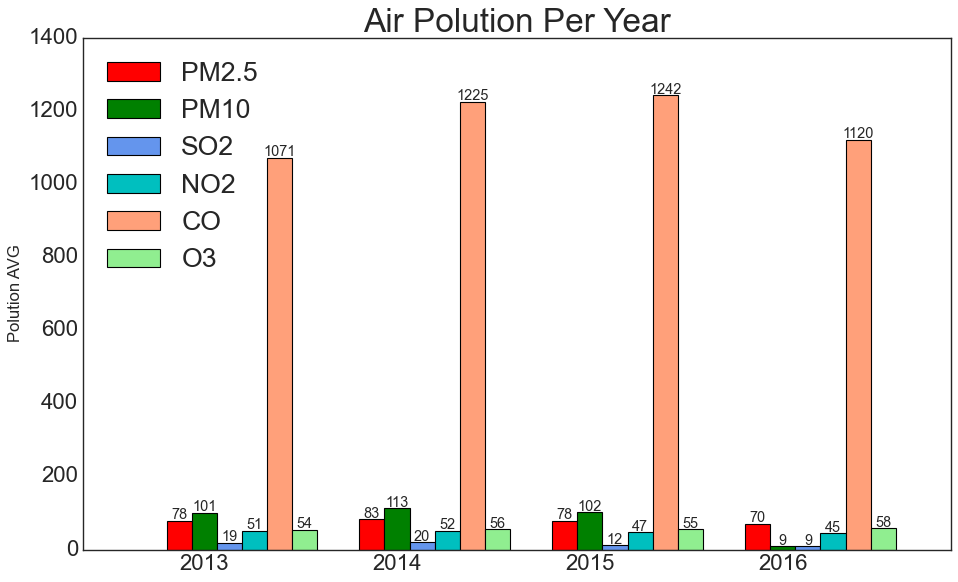

In [54]:
plt.style.use("classic")

plt.style.use('seaborn-white')
plt.rcParams.update({'font.size': 20})

#Set the figsize
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)
  

#Set up bar
N = 4
ind = np.arange(N)
width = 0.13

bar1 = plt.bar(ind, PM_25, width, color = 'r')

bar2 = plt.bar(ind+width, PM_10, width, color='g')

bar3 = plt.bar(ind+width*2, SO2, width, color='cornflowerblue')

bar4 = plt.bar(ind+width*3, NO2, width, color='c')

bar5 = plt.bar(ind+width*4, CO, width, color='lightsalmon')

bar6= plt.bar(ind+width*5, O3, width, color='lightgreen')

#Customize
plt.title('Air Polution Per Year', fontdict={'fontsize':30})
plt.ylabel('Polution AVG',fontdict={'fontsize':15})

plt.xticks(ind+width,['2013','2014','2015','2016'])
plt.legend((bar1, bar2, bar3, bar4, bar5, bar6), 
           ('PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'),
           loc='upper left'
          )

#Set up anotate
for bar1, bar2, bar3, bar4, bar5, bar6 in zip(bar1, bar2, bar3, bar4, bar5, bar6):
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    
    #Bar 1
    plt.annotate(format(bar1.get_height()),
                   (bar1.get_x() + bar1.get_width() / 2,
                   bar1.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 5),
                   textcoords='offset points')
    
    #Bar 2
    
    plt.annotate(format(bar2.get_height()),
                   (bar2.get_x() + bar2.get_width() / 2,
                   bar2.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 5),
                   textcoords='offset points')
    
    #Bar3
    
    plt.annotate(format(bar3.get_height()),
                   (bar3.get_x() + bar3.get_width() / 2,
                   bar3.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 5),
                   textcoords='offset points')
    #Bar4
    
    plt.annotate(format(bar4.get_height()),
                   (bar4.get_x() + bar4.get_width() / 2,
                   bar4.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 5),
                   textcoords='offset points')
    #Bar5
    
    plt.annotate(format(bar5.get_height()),
                   (bar5.get_x() + bar5.get_width() / 2,
                   bar5.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 5),
                   textcoords='offset points')
                 
    #Bar6
    
    plt.annotate(format(bar6.get_height()),
                   (bar6.get_x() + bar6.get_width() / 2,
                   bar6.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 5),
                   textcoords='offset points')


**How to move the legend**

So the most growing air polution is CO based on our data

### Plot the average air polution over year

In [19]:
#Since code above just averaging every independent column, we are going to average all columns
#Mean air polution year
air_polution_2013 = air_polution_2013.mean()
air_polution_2014 = air_polution_2014.mean()
air_polution_2015 = air_polution_2015.mean()
air_polution_2016 = air_polution_2016.mean()

In [20]:
#Turn all air polution year into dataframe
air_polution ={
    '2013' : air_polution_2013,
    '2014' : air_polution_2014,
    '2015' : air_polution_2015,
    '2016' : air_polution_2016
}



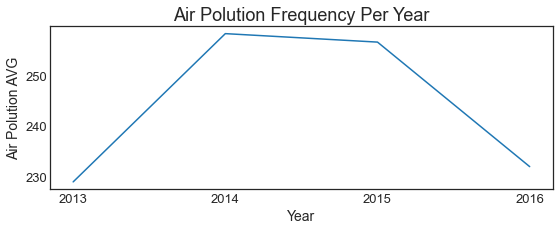

In [21]:
# Visualized air polution frequency
#Set the figsize
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(3)
  
#Plotting
plt.plot(air_polution.keys(), air_polution.values())

#Customize plot
plt.title('Air Polution Frequency Per Year', fontdict={'fontsize':18})
plt.xlabel('Year', fontdict= {'fontsize':14})
plt.ylabel('Air Polution AVG', fontdict= {'fontsize':14})

#Set the fontsize
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

Since our air polution frequence is uptrend,note for beijing= handle your air polution!

## Air polution temperature

Plan:
1. What temperature average on each air polution average, So we calculate the mean of temperaturer pr years

In [22]:
temperature_year = pd.DataFrame(data=frame_tmp, columns=['TEMP','year'])

In [23]:
#Calculate Temp average every each year
temperature_2013 = temperature_year.drop('year', axis=1)[temperature_year['year'] == 2013]
temperature_2014 = temperature_year.drop('year', axis=1)[temperature_year['year'] == 2014]
temperature_2015 = temperature_year.drop('year', axis=1)[temperature_year['year'] == 2015]
temperature_2016 = temperature_year.drop('year', axis=1)[temperature_year['year'] == 2016]



In [24]:
#Averaging our tempature per year
temperature_2013 = temperature_2013.mean()  
temperature_2014 = temperature_2014.mean() 
temperature_2015 = temperature_2015.mean()
temperature_2016 = temperature_2016.mean()

#Twice to handle unwanted datatype output on our data and round it
temperature_2013 = round(temperature_2013.mean())  
temperature_2014 = round(temperature_2014.mean()) 
temperature_2015 = round(temperature_2015.mean())
temperature_2016 = round(temperature_2016.mean())


# We dont round 2017 temp, bcz the value will be 0 if we  round

In [25]:
#Make temp avg to be a list to put in dataframe
temperature_avg = [temperature_2013, temperature_2014, temperature_2015, temperature_2016]

In [26]:
avg = pd.DataFrame()
avg['Air Polution AVG'] = air_polution.values()
avg['Temp AVG'] = temperature_avg
avg['year'] = air_polution.keys()

avg

,Air Polution AVG,Temp AVG,year
0,229.000000,16,2013
1,258.166667,14,2014
2,256.500000,13,2015
3,232.000000,14,2016


In [27]:
avg

,Air Polution AVG,Temp AVG,year
0,229.000000,16,2013
1,258.166667,14,2014
2,256.500000,13,2015
3,232.000000,14,2016


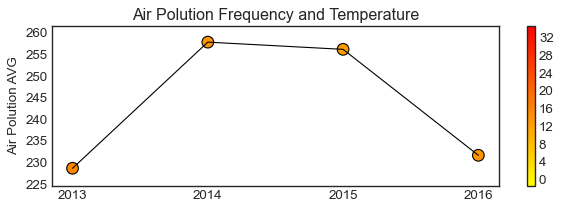

In [28]:
plt.rcParams.update({'font.size': 20})


#Turn style into classic first to save
plt.style.use('classic')

#Turn back
plt.style.use('seaborn-white')

#Create plot
fig,ax = plt.subplots(figsize=(9,2.5))

#Add line
ax.plot(avg['year'],
              avg['Air Polution AVG']
             )

#Change the line colour
ax.get_lines()[0].set_color('black')


#PLotting data
scatter=ax.scatter(
                   x=avg['year'],
                   y=avg['Air Polution AVG'],
                   c=avg['Temp AVG'],
                   cmap='autumn_r',
                   s=110)

#Add colorbar
fig.colorbar(scatter)

#Adjust the ylime range
ax.set_ylim(225, 262)

#Set the cbar range
scatter.set_clim(-1,35)

#Add label to plot
ax.set(title='Air Polution Frequency and Temperature',
            ylabel='Air Polution AVG');


Based on plot above, we can conclude that the most dangerous air polution happen when the temperature is 0 celcius

In [29]:
data_dict

{'No': 'row number',
 'year': 'year of data in this row',
 'month': 'month of data in this row',
 'day': 'day of data in this row',
 'hour': 'hour of data in this row',
 'PM2.5': 'PM2.5 concentration (ug/m^3)',
 'PM10': ' PM10 concentration (ug/m^3)',
 'SO2': 'SO2 concentration (ug/m^3)',
 'NO2': 'NO2 concentration (ug/m^3)',
 'CO': 'CO concentration (ug/m^3)',
 'O3': 'O3 concentration (ug/m^3)',
 'TEMP': 'temperature (degree Celsius)',
 'PRES': ' pressure (hPa)',
 'DEWP': ' dew point temperature (degree Celsius)',
 'RAIN': ' precipitation (mm)',
 'wd': 'wind direction',
 'WSPM': 'wind speed (m/s)',
 'station': 'name of the air-quality monitoring site'}

## Wind speed frequency per year
Plan:
1. Take the average year of wind speed per year
2. Plot wind and years (for know what year the faster wind speed)

In [30]:
#Create average of wind speed per year
wind_speed_2013 = frame_tmp['WSPM'][frame_tmp['year'] ==2013].mean()
wind_speed_2014 = frame_tmp['WSPM'][frame_tmp['year'] ==2014].mean()
wind_speed_2015 = frame_tmp['WSPM'][frame_tmp['year'] ==2015].mean()
wind_speed_2016 = frame_tmp['WSPM'][frame_tmp['year'] ==2016].mean()
# wind_speed_2017 = frame_tmp['WSPM'][frame_tmp['year'] ==2017].mean()

In [31]:
wind_speed_avg = [wind_speed_2013, wind_speed_2014, wind_speed_2015, wind_speed_2016]

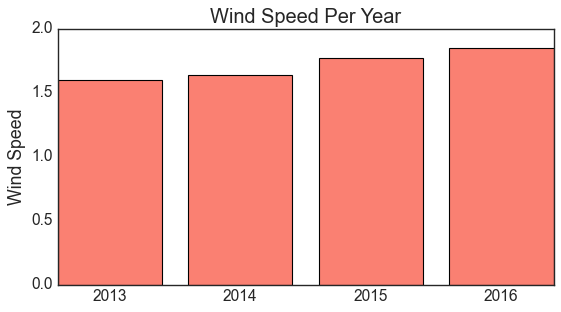

In [32]:
plt.rcParams.update({'font.size': 14})
#Create a plot
fig,ax = plt.subplots(figsize=(8,4))

ax.bar(avg['year'], wind_speed_avg,
      color='salmon')

ax.set_title('Wind Speed Per Year', fontsize=18)
ax.set_ylabel('Wind Speed',fontsize=16);
      

In [33]:
data_dict

{'No': 'row number',
 'year': 'year of data in this row',
 'month': 'month of data in this row',
 'day': 'day of data in this row',
 'hour': 'hour of data in this row',
 'PM2.5': 'PM2.5 concentration (ug/m^3)',
 'PM10': ' PM10 concentration (ug/m^3)',
 'SO2': 'SO2 concentration (ug/m^3)',
 'NO2': 'NO2 concentration (ug/m^3)',
 'CO': 'CO concentration (ug/m^3)',
 'O3': 'O3 concentration (ug/m^3)',
 'TEMP': 'temperature (degree Celsius)',
 'PRES': ' pressure (hPa)',
 'DEWP': ' dew point temperature (degree Celsius)',
 'RAIN': ' precipitation (mm)',
 'wd': 'wind direction',
 'WSPM': 'wind speed (m/s)',
 'station': 'name of the air-quality monitoring site'}

## Air polution frequency on month 

In [34]:
month_air_2013 = pd.DataFrame(data=frame_tmp[frame_tmp['year'] == 2013],
                             columns=['PM2.5','PM10','SO2','NO2','CO','O3','month'])
month_air_2014 = pd.DataFrame(data=frame_tmp[frame_tmp['year'] == 2014],
                             columns=['PM2.5','PM10','SO2','NO2','CO','O3','month'])
month_air_2015 = pd.DataFrame(data=frame_tmp[frame_tmp['year'] == 2015],
                             columns=['PM2.5','PM10','SO2','NO2','CO','O3','month'])
month_air_2016 = pd.DataFrame(data=frame_tmp[frame_tmp['year'] == 2016],
                             columns=['PM2.5','PM10','SO2','NO2','CO','O3','month'])
month_air_2017 = pd.DataFrame(data=frame_tmp[frame_tmp['year'] == 2017],
                             columns=['PM2.5','PM10','SO2','NO2','CO','O3','month'])


In [35]:
month_air_2013

,PM2.5,PM10,SO2,NO2,CO,O3,month
No,,,,,,,
1,4.0,4.0,4.0,7.0,300.0,77.0,Mar
2,8.0,8.0,4.0,7.0,300.0,77.0,Mar
3,7.0,7.0,5.0,10.0,300.0,73.0,Mar
4,6.0,6.0,11.0,11.0,300.0,72.0,Mar
5,3.0,3.0,12.0,12.0,300.0,72.0,Mar
...,...,...,...,...,...,...,...
7340,21.0,81.0,5.0,47.0,600.0,22.0,Dec
7341,21.0,81.0,5.0,47.0,700.0,7.0,Dec
7342,26.0,105.0,8.0,74.0,800.0,1.0,Dec


In [36]:
#Function for average the air polution freq per month
#I repeated the function because i have no idea for conditional logic

#For 2013
def month_mean_MarDec(df, dict_name, each_dict):
    '''
    Return the average of each air polution in integer,
    given data frame of 2013  data that start from March and empty dictionary
    '''
   
    month_MarDec = ['Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  
    air_pol = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    
    
    
    for mon in month_MarDec:
        dict_name[f'{mon}']= df.drop('month',axis=1)[df['month'] == mon].mean()
       
        #Average all air polution per month
        dict_name[f'{mon}'] = int(dict_name[f'{mon}'].mean())
        
        #Multi dimensional dictionary for each polution average
        each_dict[mon]=dict(round(df.drop('month',axis=1)[df['month'] == mon].mean()))
                 
    return dict_name

#For 2014-2016    
def month_mean_JanDec(df,dict_name, each_dict):
    '''
    Return the average of each air polution in integer,
    given data frame of 2014-2016 data that start from January to December and empty dictionary
    '''
   
    month_JanDec = ['Jan','Feb','Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']  

    for mon in month_JanDec:
        
        dict_name[f'{mon}']= df.drop('month',axis=1)[df['month'] == mon].mean()   
        
        #Average all air polution per month
        dict_name[f'{mon}'] = int(dict_name[f'{mon}'].mean())
        
        #Multi dimensional dictionary for each polution average
        each_dict[mon]=dict(df.drop('month',axis=1)[df['month'] == mon].mean())
     
            
    return dict_name

#For 2017
def month_mean_JanFeb(df,dict_name, each_dict):
    '''
    Return the average of each air polution in integer,
    given data frame of 2017 data that start from January to February and empty dictionary
    '''
   
    month_JanFeb = ['Jan','Feb']  

    for mon in month_JanFeb:
        dict_name[f'{mon}']= df.drop('month',axis=1)[df['month'] == mon].mean()        
        
      
        #Average all air polution per month
        dict_name[f'{mon}'] = int(dict_name[f'{mon}'].mean())
        
        #Multi dimensional dictionary for each polution average
        each_dict[mon]=dict(df.drop('month',axis=1)[df['month'] == mon].mean())
     
            
    return dict_name

In [37]:
# Setup dictionary
#Create a dict to keep the result
each_2013 = {}
each_2014 = {}
each_2015 = {}
each_2016 = {}
each_2017 = {}

month_2013 = {}
month_2014 = {}
month_2015 = {}
month_2016 = {}
month_2017 = {}


In [38]:

#Averaging air polution
month_mean_MarDec(month_air_2013, month_2013, each_2013)
month_mean_JanDec(month_air_2014, month_2014, each_2014)
month_mean_JanDec(month_air_2015, month_2015, each_2015)
month_mean_JanDec(month_air_2016, month_2016, each_2016)
month_mean_JanFeb(month_air_2017, month_2017, each_2017)

{'Jan': 386, 'Feb': 232}

### Plot air polution avg per month in every year

In [53]:
#We need to define the ( fig, axs = plt.subplots(2,3, figsize=(25,15)) ) first and run the function
#After define you need to delete the fig,ax an rerun the code to remove the empty subplots
fig, axs = plt.subplots(2,3, figsize=(25,15))

def plot_air_month(month_2013, month_2014, month_2015, month_2016,axs):
    
    month_dict = [month_2013,month_2014,month_2015,month_2016]
    
    shape = (0,0), (0,1), (1,0), (1,1)
    years= ['2013', '2014', '2015', '2016']
    
    plt.rcParams.update({'font.size': 20})
 
    fig, axs = plt.subplots(2,2, figsize=(25,15))
    
    #Remove 1 extra plot
#     axs[1,2].set_visible(True)
        
        
    for row_col, item, title  in zip(shape, month_dict, years):
        axs[row_col].plot(item.keys(), item.values())
        axs[row_col].scatter(item.keys(), item.values())
        
        axs[row_col].set(title=title)
        axs[0,0].set_ylabel('Air Polution AVG')
        fig.suptitle('Air Polution AVG(Year)',y=0.96, fontsize=50)
            

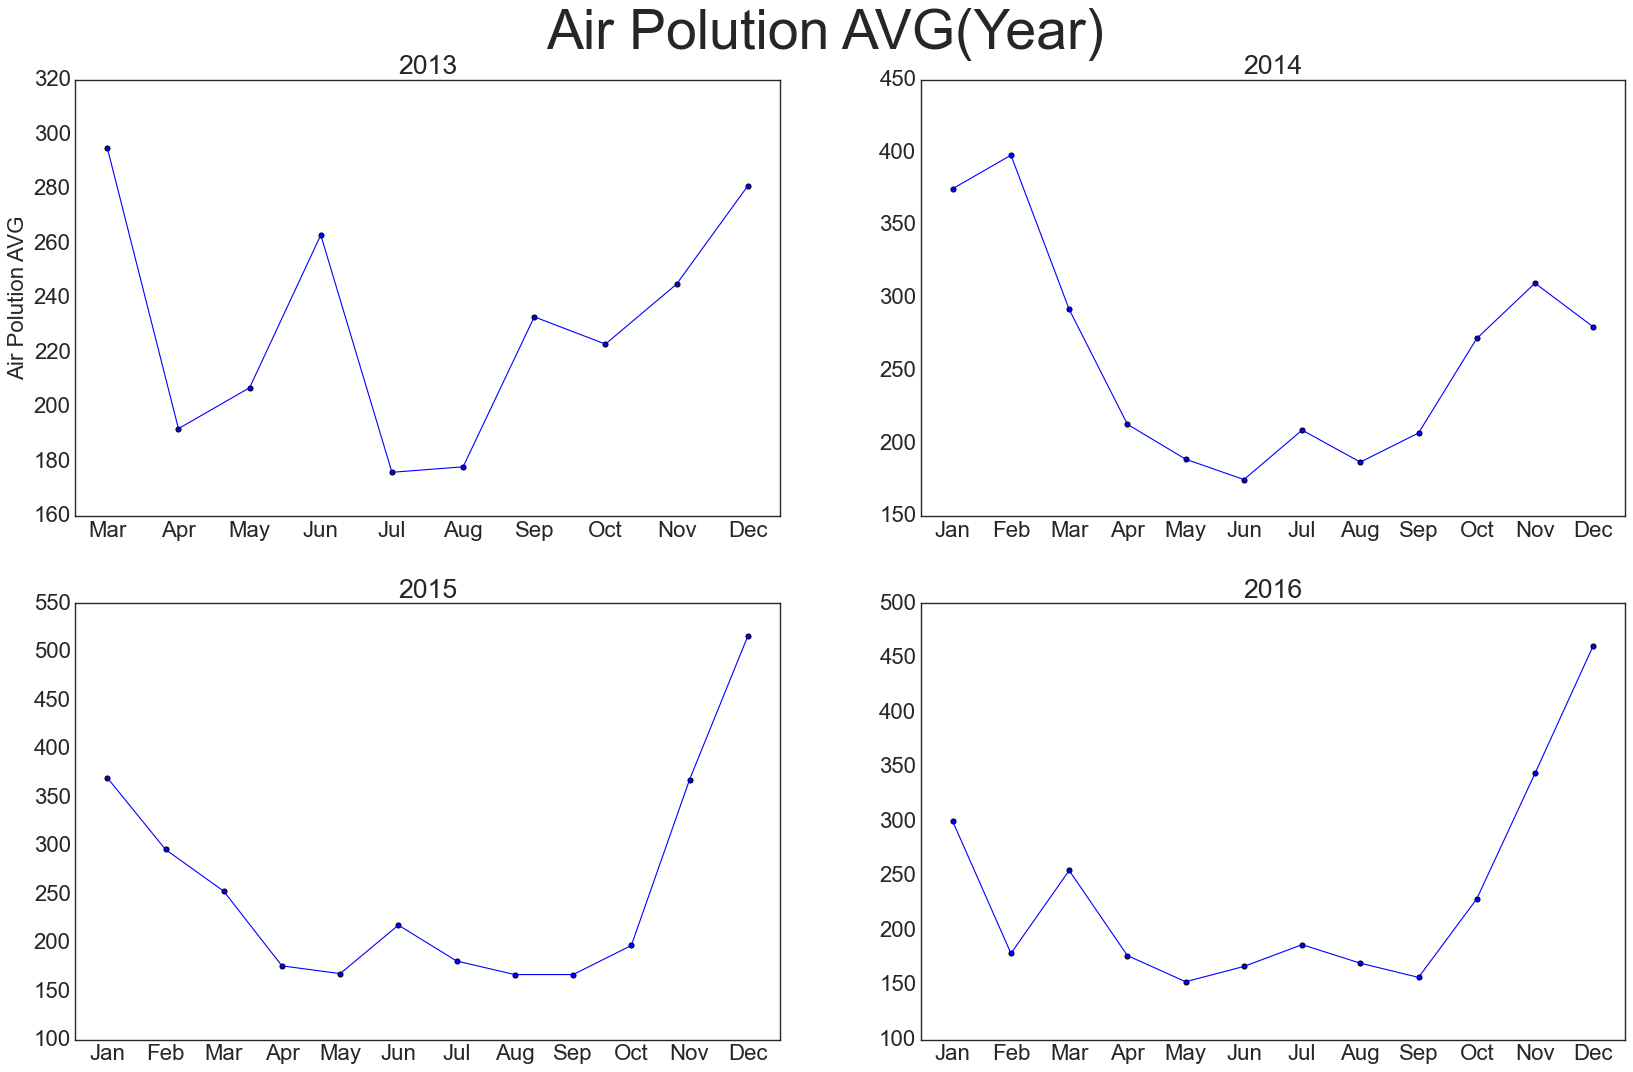

In [40]:
plot_air_month(month_2013, month_2014, month_2015, month_2016, axs)

### Plot each air polution on month in every year

         
#### Get the data ready      

In [41]:
each_2013.keys()

dict_keys(['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [42]:
list(each_2013['Mar'].keys() )

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [43]:
#Create a func to take the mean of each air polution in month every year

    
def split_polution(each_dict, result_dict):
    '''
    Return splitted each air polution mean per month and keep it in a result dictionary
    '''
    
    PM_25 = []
    PM_10= []
    SO2 = []
    NO2 = []
    CO = []
    O3 = []
    
   
    for mon in each_dict.keys() :
        for item in list(each_dict[mon].keys() ) :
            
            #Since the output before is confusing, i am going to use conditional logic
            if item == 'PM2.5':
                PM_25.append(each_dict[mon][item])
                
                #Add list into dict
                result_dict[item] = PM_25
                    
            elif item == 'PM10':
                PM_10.append(each_dict[mon][item])
                result_dict[item] = PM_10
            
            elif item == 'SO2':
                SO2.append(each_dict[mon][item])
                result_dict[item] = SO2
                
            elif item == 'NO2':
                NO2.append(each_dict[mon][item])
                result_dict[item] = NO2
            
            elif item == 'CO':
                CO.append(each_dict[mon][item])
                result_dict[item] = CO
                                          
            elif item == 'O3':
                O3.append(each_dict[mon][item])
                result_dict[item] = O3
                
    
    return result_dict     

In [44]:
#Setup dict
result_2013 = {}
result_2014 = {}
result_2015 = {}
result_2016 = {}
result_2017 = {}

#Take the mean of each air polution in month every year
split_polution(each_2013, result_2013)
split_polution(each_2014, result_2014)
split_polution(each_2015, result_2015)
split_polution(each_2016, result_2016)
split_polution(each_2017, result_2017)

{'PM2.5': [112.7820340501792, 67.47991071428571],
 'PM10': [132.92495519713262, 84.01376488095238],
 'SO2': [18.48431899641577, 17.26215277777778],
 'NO2': [62.98308691756272, 49.757688492063494],
 'CO': [1959.935035842294, 1129.9727182539682],
 'O3': [33.76131272401434, 45.457837301587304]}

In [45]:


date=pd.DataFrame()


date['Date'] = pd.date_range(start ='3-2013', 
                                end ='2-2017', 
                                freq='MS')

#Convert our date_range into datetime
date['Date'] = pd.to_datetime(date['Date'])
    
    
air_pol_name = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    
for item in air_pol_name:
    date[item] = pd.Series(data= result_2013[item])
    date[item][10:22]= pd.Series(data= result_2014[item])
    date[item][22:34]= pd.Series(data= result_2015[item])
    date[item][34:46]= pd.Series(data= result_2016[item])
    date[item][46:49]= pd.Series(data= result_2017[item])
       
date.head()

<ipython-input-45-e3be20edfcf3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date[item][10:22]= pd.Series(data= result_2014[item])
<ipython-input-45-e3be20edfcf3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date[item][22:34]= pd.Series(data= result_2015[item])
<ipython-input-45-e3be20edfcf3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date[item][34:46]= pd.Series(data= result_2016[item])
<ipython-input-45-e3be20edfcf3>

,Date,PM2.5,PM10,SO2,NO2,CO,O3
0,2013-03-01,104.0,128.0,38.0,67.0,1380.0,56.0
1,2013-04-01,62.0,95.0,21.0,45.0,871.0,60.0
2,2013-05-01,79.0,127.0,25.0,49.0,884.0,81.0
3,2013-06-01,100.0,116.0,14.0,48.0,1232.0,73.0
4,2013-07-01,65.0,75.0,7.0,38.0,798.0,77.0


### Get the peak data 

In [46]:
peak_2013= []
peak_2014= []
peak_2015= []
peak_2016= []
peak_2017= []
for item in air_pol_name:

    peak_2013.append(date[item][0:10].max())
    peak_2014.append(date[item][10:22].max())
    peak_2015.append(date[item][22:34].max())
    peak_2016.append(date[item][34:46].max())
    peak_2017.append(date[item][46:49].max())


In [47]:
peak_2013[0]

104.0

In [48]:
#Manually take the date
PM25_peak = peak_2013[0], peak_2014[0], peak_2015[0], peak_2016[0], peak_2017[0]
PM10_peak = peak_2013[1], peak_2014[1], peak_2015[1], peak_2016[1], peak_2017[1]
SO2_peak = peak_2013[2], peak_2014[2], peak_2015[2], peak_2016[2], peak_2017[2]
NO2_peak = peak_2013[3], peak_2014[3], peak_2015[3], peak_2016[3], peak_2017[3]
CO_peak = peak_2013[4], peak_2014[4], peak_2015[4], peak_2016[4], peak_2017[4]
O3_peak = peak_2013[5], peak_2014[5], peak_2015[5], peak_2016[5], peak_2017[5]

In [49]:
#Create a variable that contain the highest airpolution per year


#PM25
PM25_peak_date = []
PM10_peak_date = []
SO2_peak_date = []
NO2_peak_date = []
CO_peak_date = []
O3_peak_date = []

for PM25_max, PM10_max, SO2_max, NO2_max, CO_max, O3_max  in zip(PM25_peak, PM10_peak, SO2_peak, NO2_peak, CO_peak, O3_peak):
    
    PM25_peak_date.append(date['Date'][date['PM2.5']== PM25_max])
    PM10_peak_date.append(date['Date'][date['PM10']== PM10_max])
    SO2_peak_date.append(date['Date'][date['SO2']== SO2_max])
    NO2_peak_date.append(date['Date'][date['NO2']== NO2_max])
    CO_peak_date.append(date['Date'][date['CO']== CO_max]) 
    O3_peak_date.append(date['Date'][date['O3']== O3_max])



In [50]:
#Create a variable that contain peak_date in string
peak_date = [
    ['2013-3', '2014-2', '2015-12', '2016-12', '2017-1'],
    ['2013-3', '2014-2', '2015-12', '2016-12', '2017-1'],
    ['2013-3', '2013-12', '2014-1', '2015-1', '2016-1', '2017-1'],
    ['2013-3', '2014-10', '2015-12', '2016-12', '2017-1'],
    ['2013-12', '2014-2', '2015-12', '2016-12', '2017-1'],
    ['2013-5', '2013-8', '2014-7', '2015-7', '2016-6', '2017-2']
]

In [51]:
#Remove the extra date that have 6 colums on peak_date so we can synchronized it with our peak variable
# So2
SO2_peak_date[0].pop(0)

#O3
O3_peak_date[0].pop(5)


Timestamp('2013-08-01 00:00:00')

### Plot each air polution each year with peak every year

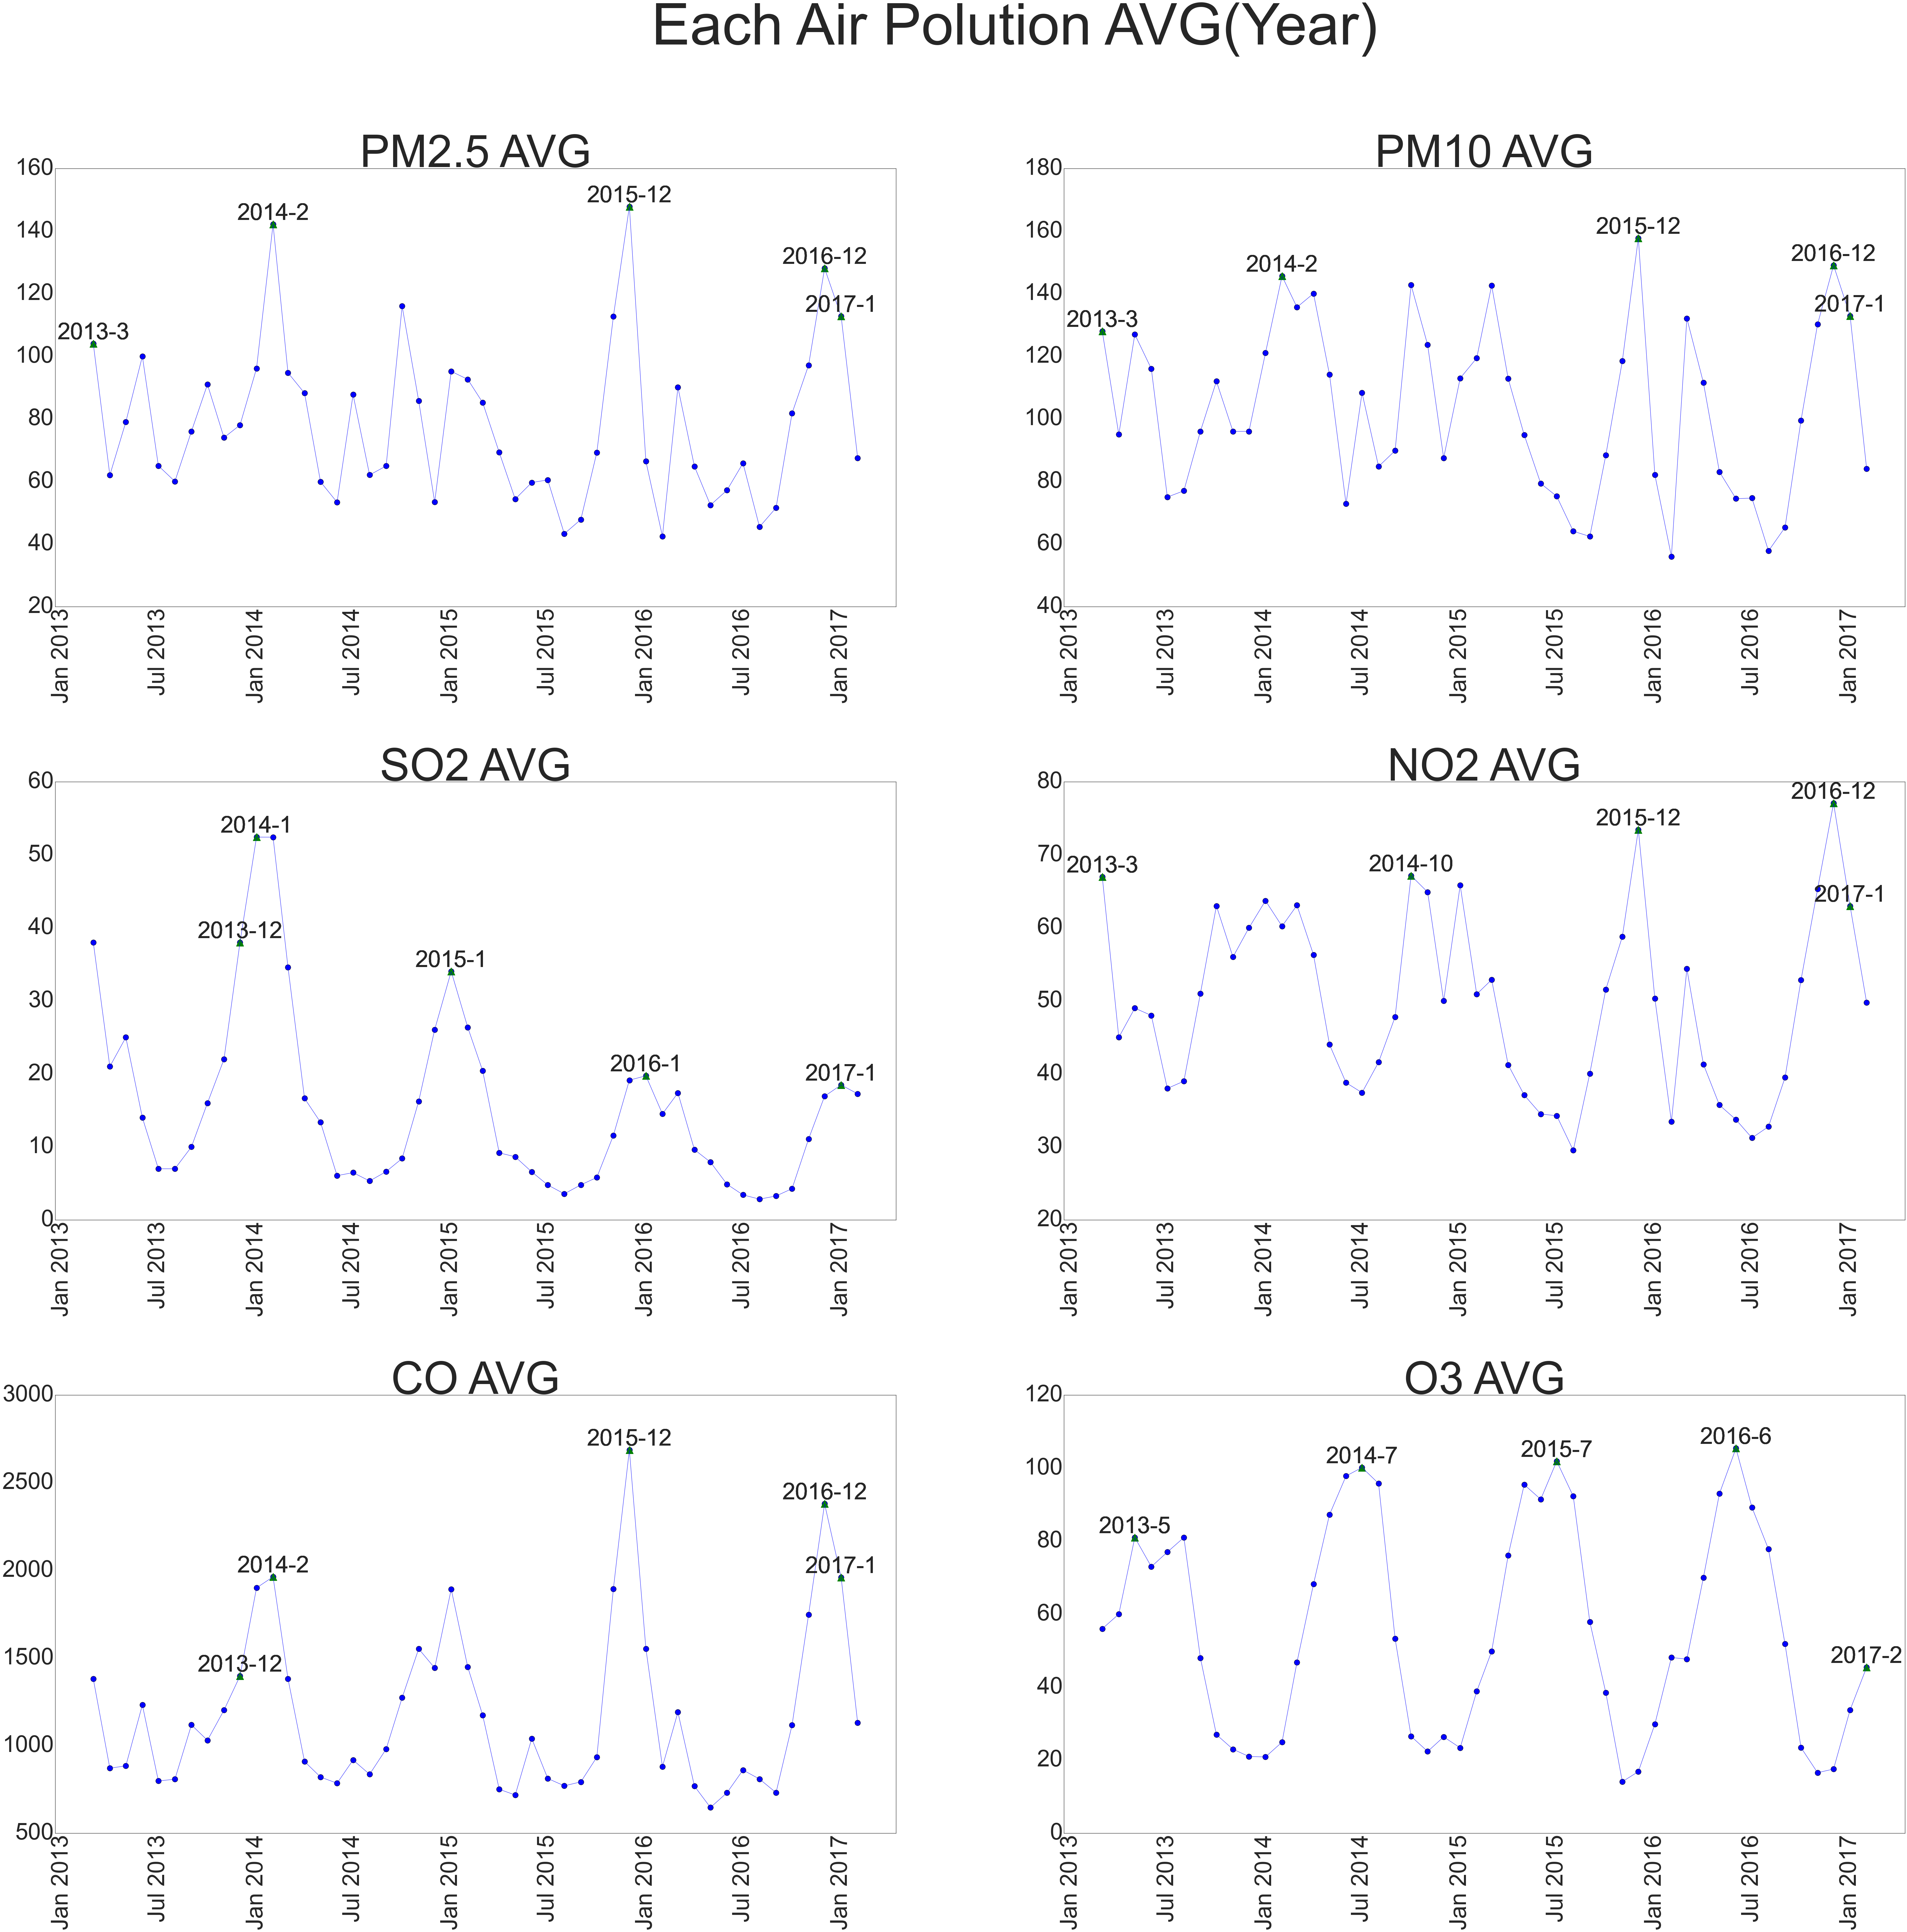

In [52]:
plt.rcParams.update({'font.size': 72})
fig, axs = plt.subplots(3,2, figsize=(100, 90))
shape = (0,0), (0,1), (1,0), (1,1), (2,0),(2,1)
title= ['PM2.5 AVG', 'PM10 AVG', 'SO2 AVG', 'NO2 AVG', 'CO AVG', 'O3 AVG']

#Plot the subplots
for row_col, air_pol, item in zip(shape, air_pol_name, title ):
    #Plotting
    axs[row_col].plot(date['Date'],  date[air_pol],
                      alpha=1,
                      color='b')
    axs[row_col].scatter(date['Date'], 
                         date[air_pol],
                         s=300)
    
    
    
    #Plot the peaks
    axs[0,0].scatter(PM25_peak_date, PM25_peak, s=500, marker="^", color='green')
    axs[0,1].scatter(PM10_peak_date, PM10_peak, s=500, marker="^", color='green')
    axs[1,0].scatter(SO2_peak_date, SO2_peak, s=500, marker="^", color='green')
    axs[1,1].scatter(NO2_peak_date, NO2_peak, s=500, marker="^", color='green')
    axs[2,0].scatter(CO_peak_date, CO_peak, s=500, marker="^", color='green')
    axs[2,1].scatter(O3_peak_date, O3_peak, s=500, marker="^", color='green')
    
    
    # Setup the anotate
    #Note:For peak date shape more than 5 = I am just taking only 5 peak date since we need to sync our peak_date shape and peak
    #PM25
    peak_date = ['2013-3','2014-2', '2015-12', '2016-12', '2017-1'] #Value take from PM25_peak_date
    for i, txt in enumerate(peak_date):
        axs[0,0].annotate(txt, (PM25_peak_date[i], PM25_peak[i]),  ha='center', va='bottom')
        
    #PM10
    peak_date = ['2013-3','2014-2', '2015-12', '2016-12', '2017-1'] #Value take from PM10_peak_date
    for i, txt in enumerate(peak_date):
        axs[0,1].annotate(txt, (PM10_peak_date[i], PM10_peak[i]),  ha='center', va='bottom')  
        
#     #SO2
    peak_date = ['2013-12','2014-1', '2015-1', '2016-1', '2017-1'] #Value take from SO2_peak_date 
    for i, txt in enumerate(peak_date):
        axs[1,0].annotate(txt, (SO2_peak_date[i], SO2_peak[i]),  ha='center', va='bottom')  
        
#     #NO2
    peak_date = ['2013-3', '2014-10', '2015-12', '2016-12', '2017-1'] #Value take from NO2_peak_date
    for i, txt in enumerate(peak_date):
        axs[1,1].annotate(txt, (NO2_peak_date[i], NO2_peak[i]),  ha='center', va='bottom')  
        
#     #CO
    peak_date = ['2013-12', '2014-2', '2015-12', '2016-12', '2017-1'] #Value take from CO_peak_date
    for i, txt in enumerate(peak_date):
        axs[2,0].annotate(txt, (CO_peak_date[i],CO_peak[i]),  ha='center', va='bottom')  
        
# #     #O3
    peak_date = ['2013-5', '2014-7', '2015-7', '2016-6', '2017-2'] #Value take from O3_peak_date
    for i, txt in enumerate(peak_date):
        axs[2,1].annotate(txt, (O3_peak_date[i], O3_peak[i]),  ha='center', va='bottom')  
    

    #Customize plot
    axs[row_col].set_title(item, fontdict={'fontsize': 140})
#     axs[row_col].set_xlabel(fontdict= {'fontsize':100 })
#     axs[row_col].set_ylabel(font_dict={'fontsize':100 })
    
    fig.suptitle('Each Air Polution AVG(Year)',
                 x=0.515,
                 y=0.98 ,
                 fontsize='180')

#Rotate the Xticks
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90, )
    
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

## Conclusion
Based on our data and visualization, we can conclude that:
1. Beijing air polution is going bad in period 2013-2016.
2. The air polution frequency is always increasing at the end of the year usually at September until December every year.